**Inteligência Artificial e Computacional / AI&Chatbot**

Prof. Miguel Bozer da Silva - profmiguel.silva@fiap.com.br

---


Os dados utilizados nessa aula foram extraídos e modificados no site a seguir:

https://www.kaggle.com/fedesoriano/stroke-prediction-dataset

---

# Recebendo dados em csv:

Antes de carregar o seu arquivo csv certifique-se qual o tipo de separação entre as colunas que foi aplicado no arquivo. Para isso, basta abrir o mesmo num bloco de notas e checar como a separação está sendo feita.

Na sequência verifique se a codificação do arquivo está no padrão UTF-8. Para isso, clique em Arquivo, Salvar Como e verifique o padrão em Codificação.

Agora iremos carregar os nossos dados com o auxílio da biblioteca Pandas. Essa biblioteca nos permite visualizar os dados de forma tabular. Para isso faça o upload dos seus arquivos na pasta ao lado.

In [ ]:
# Importando o pandas
import pandas as pd

# Armazenandos os dados em um DataFrame
dados = pd.read_csv("healthcare-dataset-stroke-modificado_rev_1.csv", sep = ';') 

Poderíamos usar o Colab para alguma atividade em grupo onde todos podem usar o mesmo arquivo compartilhado. Para isso, faça o upload do seu arquivo csv no Google Drive. Compartilhe o arquivo com a permissão para edição. Após isso, copie o link de compartilhamento, vamos precisar dele para carregar o arquivo:

In [72]:
# Importando o pandas

import pandas as pd

# Recebendo os dados:
from google_drive_downloader import GoogleDriveDownloader as gdd

data_google_id = '1DntP4k260Y1Czc0R37axqleDhFeBiByz'
gdd.download_file_from_google_drive(file_id=data_google_id, 
                                    dest_path = './dados.csv', # Faz o download dos dados e salva o mesmo num arquivo nomeado data.csv
                                    showsize = True)

# Armazenandos os dados em um DataFrame
dados = pd.read_csv("dados.csv", sep = ';') 


O arquivo acima está disponível no link: https://drive.google.com/file/d/1ys03MPOO5Yn2XE8aBai3HkCkVE16EhtC/view?usp=sharing

Repare que o '1ys03MPOO5Yn2XE8aBai3HkCkVE16EhtC' é uma parte do link acima. Para fazer isso com diferentes arquivos, primeiro faço o upload no Google Drive. Após isso, compartilhar o arquivo pegando o link do mesmo para extrair a parte desejada do arquivo.

# Introdução ao Pandas

Aqui iremos aprender um pouco sobre o Pandas para que em problemas futuros seja possível conhecer algumas possíveis soluções usando essa API.

In [ ]:
type(dados)

pandas.core.frame.DataFrame

In [ ]:
# visualizar as 5 primeiras linha
dados.head()

,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10
0,9046,Male,67,No,Yes,Yes,five or more symptoms,22869,36.6,formerly smoked,Yes
1,51676,Female,61,No,No,Yes,three symptoms,20221,NaN,never smoked,Yes
2,31112,Male,80,No,Yes,Yes,five or more symptoms,10592,32.5,never smoked,Yes
3,60182,Female,49,No,No,Yes,five or more symptoms,17123,34.4,smokes,Yes
4,1665,Female,79,Yes,No,Yes,three symptoms,17412,24.0,never smoked,Yes


In [ ]:
# últimas linhas
dados.tail()

,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10
5105,18234,Female,80,Yes,No,Yes,five or more symptoms,8375,NaN,never smoked,No
5106,44873,Female,81,No,No,Yes,three symptoms,1252,40.0,never smoked,No
5107,19723,Female,35,No,No,Yes,three symptoms,8299,30.6,never smoked,No
5108,37544,Male,51,No,No,Yes,five or more symptoms,16629,25.6,formerly smoked,No
5109,44679,Female,44,No,No,Yes,four symptoms,8528,26.2,Unknown,No


Podemos checar os tipos de dados envolvidos no nosso problema com a função `info()`:

In [ ]:
# tipos de dados
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X0      5110 non-null   int64  
 1   X1      5110 non-null   object 
 2   X2      5110 non-null   int64  
 3   X3      5110 non-null   object 
 4   X4      5110 non-null   object 
 5   X5      5110 non-null   object 
 6   X6      5110 non-null   object 
 7   X7      5110 non-null   int64  
 8   X8      4909 non-null   float64
 9   X9      5110 non-null   object 
 10  X10     5110 non-null   object 
dtypes: float64(1), int64(3), object(7)
memory usage: 439.3+ KB


In [ ]:
# tamanho dos dados
dados.shape

(5110, 11)

## Filtrando os dados

Podemos filtrar os dados do nosso dataset para acessar algumas linhas ou colunas dele. Nas seções a seguir iremos trabalhar alguns desses exemplos:

### Filtrando os dados a partir das suas colunas

*   É possível filtrar uma coluna inteira da tabela usando `df.nomeDaColuna`

In [ ]:
dados.X6

0       five or more symptoms 
1              three symptoms 
2       five or more symptoms 
3       five or more symptoms 
4              three symptoms 
                 ...          
5105    five or more symptoms 
5106           three symptoms 
5107           three symptoms 
5108    five or more symptoms 
5109            four symptoms 
Name: X6, Length: 5110, dtype: object

In [ ]:
A = dados.X1
type(A)

pandas.core.series.Series

In [ ]:
A

0         Male
1       Female
2         Male
3       Female
4       Female
         ...  
5105    Female
5106    Female
5107    Female
5108      Male
5109    Female
Name: X1, Length: 5110, dtype: object

*   Dessa forma não conseguimos selecionar colunas que tenham espaços em seu nome. Uma forma de resolver isso é com o `df['nomeDaColuna']`

In [ ]:
# Selecionando apenas uma coluna
dados["X6"]

0       five or more symptoms 
1              three symptoms 
2       five or more symptoms 
3       five or more symptoms 
4              three symptoms 
                 ...          
5105    five or more symptoms 
5106           three symptoms 
5107           three symptoms 
5108    five or more symptoms 
5109            four symptoms 
Name: X6, Length: 5110, dtype: object

In [ ]:
B = dados['X3']
B

0        No
1        No
2        No
3        No
4       Yes
       ... 
5105    Yes
5106     No
5107     No
5108     No
5109     No
Name: X3, Length: 5110, dtype: object

In [ ]:
#Podemos passar uma lista das colunas que desejamos selecionar
dados[["X1","X2","X6"]]

,X1,X2,X6
0,Male,67,five or more symptoms
1,Female,61,three symptoms
2,Male,80,five or more symptoms
3,Female,49,five or more symptoms
4,Female,79,three symptoms
...,...,...,...
5105,Female,80,five or more symptoms
5106,Female,81,three symptoms
5107,Female,35,three symptoms
5108,Male,51,five or more symptoms


In [ ]:
C = dados[["X0","X4","X8"]]
C.head()

,X0,X4,X8
0,9046,Yes,36.6
1,51676,No,NaN
2,31112,Yes,32.5
3,60182,No,34.4
4,1665,No,24.0


*   Podemos também selecionar os dados a partir dos **números das linhas e de suas colunas** usando o método `iloc`

In [ ]:
#Filtrando pelos números de linhas e colunas
# linha 0, coluna 1
dados.iloc[0, 1]

'Male'

In [ ]:
#Selecionando linhas e colunas especificas
dados.iloc[[1,4], [1,5]]

,X1,X5
1,Female,Yes
4,Female,Yes


In [ ]:
#Selecionando um intervalo de linhas e duas colunas
dados.iloc[0:10, [1,5]]

,X1,X5
0,Male,Yes
1,Female,Yes
2,Male,Yes
3,Female,Yes
4,Female,Yes
5,Male,Yes
6,Male,Yes
7,Female,N
8,Female,Yes
9,Female,Yes


*   Também é possível selecionar os dados a partir dos **números de suas linhas NOMES das suas colunas** usando o método `loc`

In [ ]:
# Acessando todos os dados das colunas X1 e X5
dados.loc[:,["X1","X5"]]

,X1,X5
0,Male,Yes
1,Female,Yes
2,Male,Yes
3,Female,Yes
4,Female,Yes
...,...,...
5105,Female,Yes
5106,Female,Yes
5107,Female,Yes
5108,Male,Yes


In [ ]:
# Acessando um intervalo de dados das colunas X1 até X4
dados.loc[10:20,"X1":"X4"]

,X1,X2,X3,X4
10,Female,81,Yes,No
11,Female,61,No,Yes
12,Female,54,No,No
13,Male,78,No,Yes
14,Female,79,No,Yes
15,Female,50,Yes,No
16,Male,64,No,Yes
17,Male,75,Yes,No
18,Female,60,No,No
19,Male,57,No,Yes


### Filtrando os dados a partir de mascaras.

*   É possível filtrar os dados com o uso de valores booleanos `[True,False]`. Onde quando o valor de uma linha é `True`, a mesma será exibida e se o valor é `False` o valor será ocultado.

In [ ]:
#Criando uma mascara com valores maiores ou iguais a 50
dados["X2"] >=50

0        True
1        True
2        True
3       False
4        True
        ...  
5105     True
5106     True
5107    False
5108     True
5109    False
Name: X2, Length: 5110, dtype: bool

In [ ]:
#Criando uma mascara para valores iguais a Male
dados.X1 == "Male"

0        True
1       False
2        True
3       False
4       False
        ...  
5105    False
5106    False
5107    False
5108     True
5109    False
Name: X1, Length: 5110, dtype: bool

Podemos também expressar lógicas E (`&`) e OU (`|`)

In [ ]:
#Criando uma mascara com valores iguais a Male e maiores ou iguais a 50
(dados.X1 == "Male") & (dados.X2 >=50)

0        True
1       False
2        True
3       False
4       False
        ...  
5105    False
5106    False
5107    False
5108     True
5109    False
Length: 5110, dtype: bool

In [ ]:
#Criando uma mascara com valores iguais a Male ou maiores ou iguais a 50
(dados.X1 == "Male") | (dados.X2 >=50)

0        True
1        True
2        True
3       False
4        True
        ...  
5105     True
5106     True
5107    False
5108     True
5109    False
Length: 5110, dtype: bool

*   Podemos passar a mascara para um DataFrame e visualizar apenas as linhas onde os valores são verdadeiros pela mascara.

In [ ]:
# Filtrando todo o conjunto de dados
dados[(dados.X1 == "Male") & (dados.X2 >=50)]

,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10
0,9046,Male,67,No,Yes,Yes,five or more symptoms,22869,36.6,formerly smoked,Yes
2,31112,Male,80,No,Yes,Yes,five or more symptoms,10592,32.5,never smoked,Yes
5,56669,Male,81,No,No,Yes,five or more symptoms,18621,29.0,formerly smoked,Yes
6,53882,Male,74,Yes,Yes,Yes,five or more symptoms,7009,27.4,never smoked,Yes
13,8213,Male,78,No,Yes,Yes,five or more symptoms,21984,NaN,Unknown,Yes
...,...,...,...,...,...,...,...,...,...,...,...
5095,68598,Male,108,No,No,No,one or two symptoms,7915,17.4,Unknown,No
5096,41512,Male,57,No,No,Yes,four symptoms,7662,28.2,never smoked,No
5097,64520,Male,68,No,No,Yes,three symptoms,9168,40.8,Unknown,No
5100,68398,Male,82,Yes,No,Yes,three symptoms,7197,28.3,never smoked,No


In [ ]:
# Filtrando apenas colunas selecionadas
dados[["X1","X2"]][(dados.X1 == "Male") & (dados.X2 >=50)]

,X1,X2
0,Male,67
2,Male,80
5,Male,81
6,Male,74
13,Male,78
...,...,...
5095,Male,108
5096,Male,57
5097,Male,68
5100,Male,82


Exercício:

Carregar o dataset de exercícios no Colab e visualizar:

a) as 5 primeiras linhas e as 5 últimas linhas;

b) os tipos de dados de cada uma das colunas;

c) Criar um DataFrame "B" a partir de duas colunas dos seus dados

d) Criem uma mascara para filtrar os dados onde a produtividade seja maior do que 0.7

## Acessando valores estatisticos:

*   Podemos encontrar a média, mediana, minimo, máximo e desvio padrão utilizando os métodos `mean()`, `median()` `min()`, `max()` e `std()`

In [ ]:
#Encontrando os valores estatísticos
media_X2 = dados["X2"].mean()
mediana_X2 = dados["X2"].median()
min_X2 = dados["X2"].min()
max_X2 = dados["X2"].max()
desvpad_X2 = dados["X2"].std()

print(f"Média: {media_X2} \nMediana: {mediana_X2}\nMinimo: {min_X2} \nMáximo: {max_X2}\nDesvio padrão: {desvpad_X2}" )

Média: 45.33424657534247 
Mediana: 46.0
Minimo: -20 
Máximo: 188
Desvio padrão: 24.70138394761008


*   O método describe() é útil para nos dar um resumo dos valores estatisticos dos nossos dados:

In [ ]:
dados.describe()

,X0,X2,X7,X8
count,5110.000000,5110.000000,5110.000000,4909.000000
mean,36517.829354,45.334247,9622.809198,28.893237
std,21161.721625,24.701384,5151.737041,7.854067
min,67.000000,-20.000000,59.000000,10.300000
25%,17741.250000,27.000000,7122.000000,23.500000
50%,36932.000000,46.000000,8851.000000,28.100000
75%,54682.000000,62.000000,11102.000000,33.100000
max,72940.000000,188.000000,27174.000000,97.600000


## Criando funções e novas colunas no DataFrame

Podemos criar uma coluna a partir de outra existente para realizar algum tratamento dos dados ou para realizarmos uma operação matemática

In [ ]:
dados["X11"] = dados["X2"]**2

In [ ]:
dados.head()

,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11
0,9046,Male,67,No,Yes,Yes,five or more symptoms,22869,36.6,formerly smoked,Yes,4489
1,51676,Female,61,No,No,Yes,three symptoms,20221,NaN,never smoked,Yes,3721
2,31112,Male,80,No,Yes,Yes,five or more symptoms,10592,32.5,never smoked,Yes,6400
3,60182,Female,49,No,No,Yes,five or more symptoms,17123,34.4,smokes,Yes,2401
4,1665,Female,79,Yes,No,Yes,three symptoms,17412,24.0,never smoked,Yes,6241


In [ ]:
# Criando uma função matematica mais complexa
def normalizacao(valor):
  return (valor - min_X2)/(max_X2-min_X2)

In [ ]:
dados["X12"] = dados["X2"].apply(normalizacao)
dados["X12"]

0       0.418269
1       0.389423
2       0.480769
3       0.331731
4       0.475962
          ...   
5105    0.480769
5106    0.485577
5107    0.264423
5108    0.341346
5109    0.307692
Name: X12, Length: 5110, dtype: float64

In [ ]:
dados.head()

,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12
0,9046,Male,67,No,Yes,Yes,five or more symptoms,22869,36.6,formerly smoked,Yes,4489,0.418269
1,51676,Female,61,No,No,Yes,three symptoms,20221,NaN,never smoked,Yes,3721,0.389423
2,31112,Male,80,No,Yes,Yes,five or more symptoms,10592,32.5,never smoked,Yes,6400,0.480769
3,60182,Female,49,No,No,Yes,five or more symptoms,17123,34.4,smokes,Yes,2401,0.331731
4,1665,Female,79,Yes,No,Yes,three symptoms,17412,24.0,never smoked,Yes,6241,0.475962


## Removendo colunas dos dados

Para removermos as colunas que criamos podemos usar o método `drop()`

In [ ]:
dados.drop(columns=["X11","X12"])

,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10
0,9046,Male,67,No,Yes,Yes,five or more symptoms,22869,36.6,formerly smoked,Yes
1,51676,Female,61,No,No,Yes,three symptoms,20221,NaN,never smoked,Yes
2,31112,Male,80,No,Yes,Yes,five or more symptoms,10592,32.5,never smoked,Yes
3,60182,Female,49,No,No,Yes,five or more symptoms,17123,34.4,smokes,Yes
4,1665,Female,79,Yes,No,Yes,three symptoms,17412,24.0,never smoked,Yes
...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80,Yes,No,Yes,five or more symptoms,8375,NaN,never smoked,No
5106,44873,Female,81,No,No,Yes,three symptoms,1252,40.0,never smoked,No
5107,19723,Female,35,No,No,Yes,three symptoms,8299,30.6,never smoked,No
5108,37544,Male,51,No,No,Yes,five or more symptoms,16629,25.6,formerly smoked,No


In [ ]:
dados.head()

,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12
0,9046,Male,67,No,Yes,Yes,five or more symptoms,22869,36.6,formerly smoked,Yes,4489,0.418269
1,51676,Female,61,No,No,Yes,three symptoms,20221,NaN,never smoked,Yes,3721,0.389423
2,31112,Male,80,No,Yes,Yes,five or more symptoms,10592,32.5,never smoked,Yes,6400,0.480769
3,60182,Female,49,No,No,Yes,five or more symptoms,17123,34.4,smokes,Yes,2401,0.331731
4,1665,Female,79,Yes,No,Yes,three symptoms,17412,24.0,never smoked,Yes,6241,0.475962


Como não usamos o argumento `inplace=True` os dados não foram salvos no DataFrame original. Assim, é necessário incluir esse argumento para que isso aconteça.


In [ ]:
dados.drop(columns=["X11","X12"],inplace=True)

In [ ]:
dados.head()

,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10
0,9046,Male,67,No,Yes,Yes,five or more symptoms,22869,36.6,formerly smoked,Yes
1,51676,Female,61,No,No,Yes,three symptoms,20221,NaN,never smoked,Yes
2,31112,Male,80,No,Yes,Yes,five or more symptoms,10592,32.5,never smoked,Yes
3,60182,Female,49,No,No,Yes,five or more symptoms,17123,34.4,smokes,Yes
4,1665,Female,79,Yes,No,Yes,three symptoms,17412,24.0,never smoked,Yes


# Análise Exploratória dos Dados

Vamos começar analisando o tipo de dados envolvidos no nosso dataset. Algoritmos de Machine Learning precisam de dados númericos para funcionarem. Dessa forma, dados do tipo int ou float são aceitáveis para o nosso projeto, enquanto que dados do tipo object deverão ser tratados.

In [73]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X0      5110 non-null   int64  
 1   X1      5110 non-null   object 
 2   X2      5110 non-null   int64  
 3   X3      5110 non-null   object 
 4   X4      5110 non-null   object 
 5   X5      5110 non-null   object 
 6   X6      5110 non-null   object 
 7   X7      5110 non-null   int64  
 8   X8      4909 non-null   float64
 9   X9      5110 non-null   object 
 10  X10     5110 non-null   object 
dtypes: float64(1), int64(3), object(7)
memory usage: 439.3+ KB


In [74]:
# visualizar
dados.head()

,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10
0,9046,Male,67,No,Yes,Yes,five or more symptoms,22869,36.6,formerly smoked,Yes
1,51676,Female,61,No,No,Yes,three symptoms,20221,NaN,never smoked,Yes
2,31112,Male,80,No,Yes,Yes,five or more symptoms,10592,32.5,never smoked,Yes
3,60182,Female,49,No,No,Yes,five or more symptoms,17123,34.4,smokes,Yes
4,1665,Female,79,Yes,No,Yes,three symptoms,17412,24.0,never smoked,Yes


Temos 11 colunas distintas com nomes diferentes de X0 até X11. Podemos mudar o nome das colunas para algo que nos ajude na visualização dos dados. Supondo que:

1) id: unique identifier

2) gender: "Male", "Female" or "Other"

3) age: age of the patient

4) hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension

5) heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease

6) ever_married: "No" or "Yes"

7) symptoms: "no symptoms ", "one or two symptoms", "three symptoms", "four symptoms" or "five or more symptoms"

8) avg_glucose_level: average glucose level in blood

9) bmi: body mass index

10) smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*

11) stroke: 1 if the patient had a stroke or 0 if not

*Note: "Unknown" in smoking_status means that the information is unavailable for this patient

In [75]:
dados.columns

Index(['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10'], dtype='object')

In [76]:
# Substituindo os nomes das colunas:
dados.columns = ["Id","Genero","Idade","Hipertensão","DoencaCoracao","JaFoiCasado","Sintomas","NivelGlucose",
                    "IMC","Fumante","AVC"]

In [77]:
# visualizar
dados.head()

,Id,Genero,Idade,Hipertensão,DoencaCoracao,JaFoiCasado,Sintomas,NivelGlucose,IMC,Fumante,AVC
0,9046,Male,67,No,Yes,Yes,five or more symptoms,22869,36.6,formerly smoked,Yes
1,51676,Female,61,No,No,Yes,three symptoms,20221,NaN,never smoked,Yes
2,31112,Male,80,No,Yes,Yes,five or more symptoms,10592,32.5,never smoked,Yes
3,60182,Female,49,No,No,Yes,five or more symptoms,17123,34.4,smokes,Yes
4,1665,Female,79,Yes,No,Yes,three symptoms,17412,24.0,never smoked,Yes


## Dados Categóricos

Vamos analisar como estão as proporções dos nossos dados categóricos nesse conjunto de dados.

In [78]:
import seaborn as sns
import matplotlib.pyplot as plt

Podemos plotar um gráfico com todas as variáveis categóricas:

In [79]:
colunas_categoricas = ["Genero", "Hipertensão", "DoencaCoracao", "JaFoiCasado", "Sintomas", "Fumante", "AVC"]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


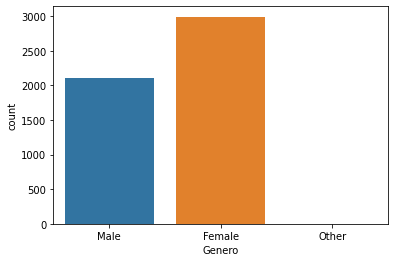

In [80]:
sns.countplot(dados["Genero"])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

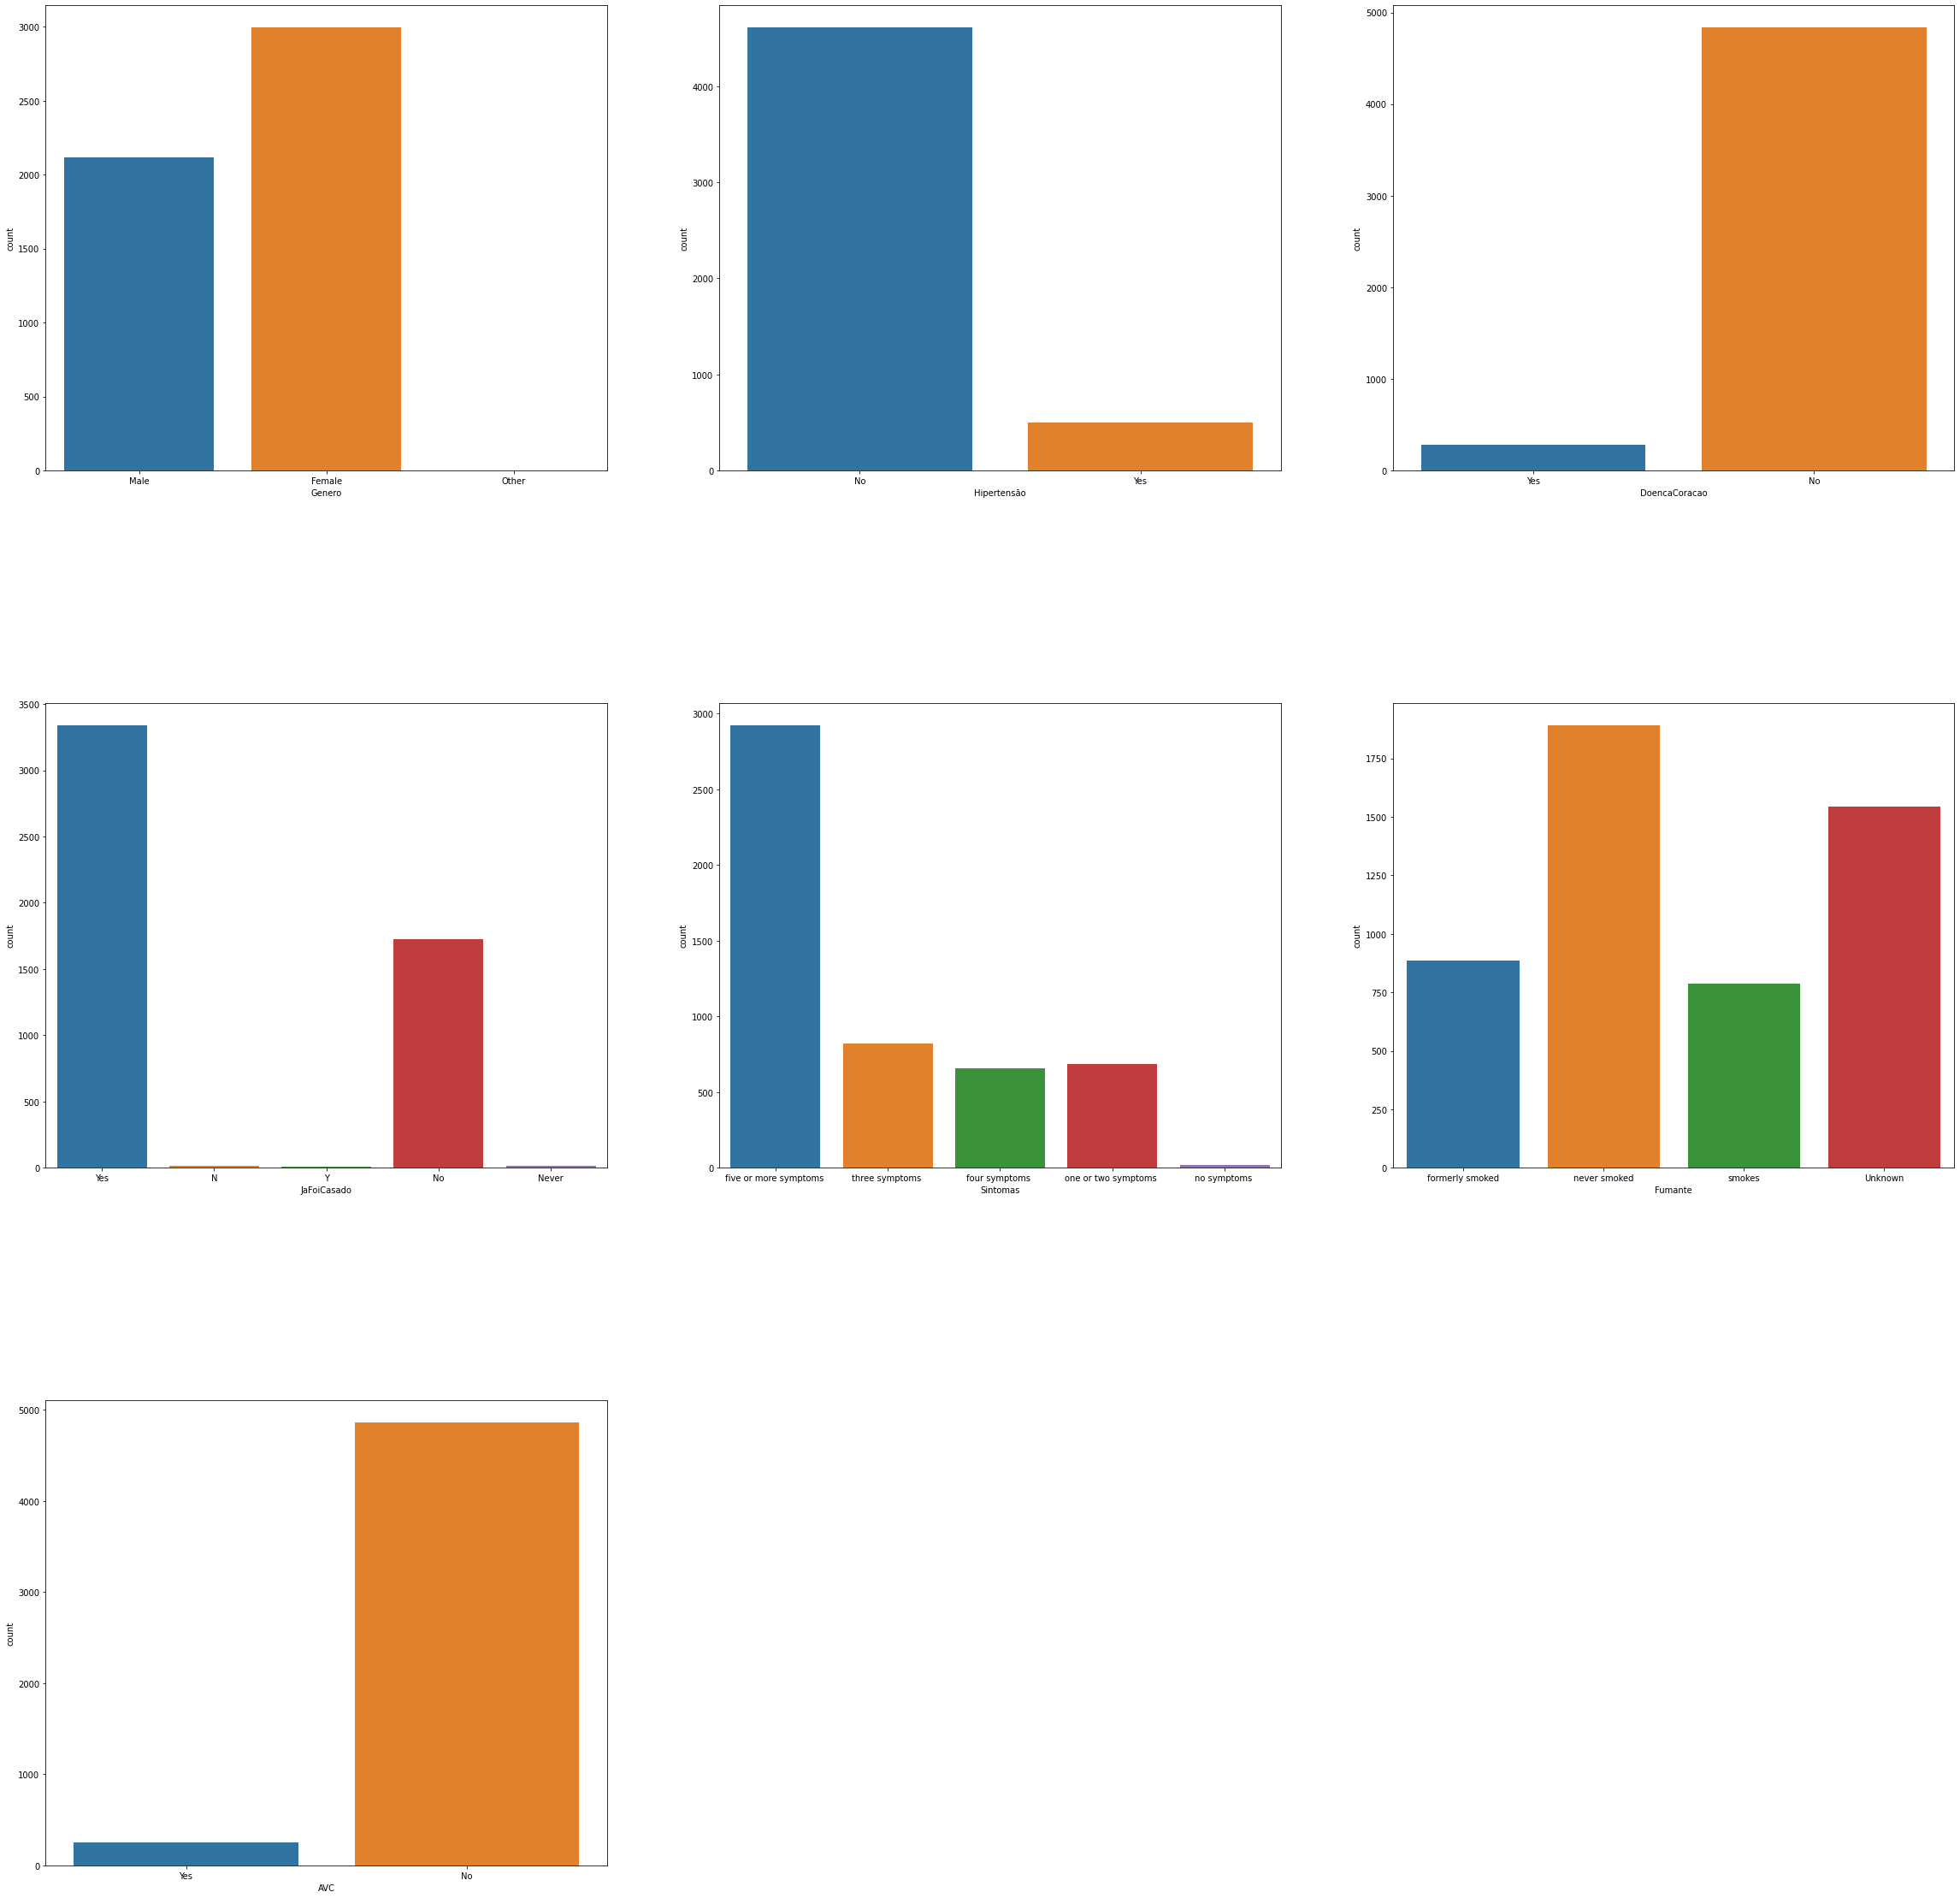

In [81]:
plt.figure(figsize=(40,40))
plt.subplots_adjust(hspace=0.5)
i = 1
for col_name in colunas_categoricas:
    plt.subplot(3,3,i)
    sns.countplot(dados[col_name])
    i += 1

Ou podemos checar uma a uma qual a sua distribuição:

In [82]:
#explorar dados categoricos
#Genero
dados.groupby(['Genero']).size()

Genero
Female    2994
Male      2115
Other        1
dtype: int64

Como temos apenas um resultado como "Other" não podemos dizer que temos dados que possam ser relevantes para pessoas que não se identificam com nenhum dos dois generos para esse exemplo. Teremos que tratar isso de alguma forma.

In [83]:
#explorar dados categoricos
#Hipertensão
dados.groupby(['Hipertensão']).size()

Hipertensão
No     4612
Yes     498
dtype: int64

In [84]:
#explorar dados categoricos
#DoencaCoracao
dados.groupby(['DoencaCoracao']).size()

DoencaCoracao
No     4834
Yes     276
dtype: int64

In [85]:
#explorar dados categoricos
#JaFoiCasado
dados.groupby(['JaFoiCasado']).size()

JaFoiCasado
N          18
Never      15
No       1724
Y          12
Yes      3341
dtype: int64

Nessa coluna temos diversas respostas em classes distintas, mas que significam a mesma coisa, como "Y" e "Yes" ou "N", "No" e "Never"

In [86]:
#explorar dados categoricos
#Sintomas
dados.groupby(['Sintomas']).size()

Sintomas
five or more symptoms     2925
four symptoms              657
no symptoms                 22
one or two symptoms        687
three symptoms             819
dtype: int64

In [87]:
#explorar dados categoricos
#Fumante
dados.groupby(['Fumante']).size()

Fumante
Unknown            1544
formerly smoked     885
never smoked       1892
smokes              789
dtype: int64

In [88]:
#explorar dados categoricos
#AVC
dados.groupby(['AVC']).size()

AVC
No     4861
Yes     249
dtype: int64

In [89]:
# exibindo todos os valores numa linha única de código
for col_name in colunas_categoricas:
    print('-------------------------------')
    print(dados.groupby([col_name]).size())

-------------------------------
Genero
Female    2994
Male      2115
Other        1
dtype: int64
-------------------------------
Hipertensão
No     4612
Yes     498
dtype: int64
-------------------------------
DoencaCoracao
No     4834
Yes     276
dtype: int64
-------------------------------
JaFoiCasado
N          18
Never      15
No       1724
Y          12
Yes      3341
dtype: int64
-------------------------------
Sintomas
five or more symptoms     2925
four symptoms              657
no symptoms                 22
one or two symptoms        687
three symptoms             819
dtype: int64
-------------------------------
Fumante
Unknown            1544
formerly smoked     885
never smoked       1892
smokes              789
dtype: int64
-------------------------------
AVC
No     4861
Yes     249
dtype: int64


## Dados Numéricos

Vamos usar o método `describe()` para visualizar as informações dos dados númericos

In [90]:
dados.describe()

,Id,Idade,NivelGlucose,IMC
count,5110.000000,5110.000000,5110.000000,4909.000000
mean,36517.829354,45.334247,9622.809198,28.893237
std,21161.721625,24.701384,5151.737041,7.854067
min,67.000000,-20.000000,59.000000,10.300000
25%,17741.250000,27.000000,7122.000000,23.500000
50%,36932.000000,46.000000,8851.000000,28.100000
75%,54682.000000,62.000000,11102.000000,33.100000
max,72940.000000,188.000000,27174.000000,97.600000


Podemos também plotar histogramas para verificarmos visualmente essas distribuições dos dados

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f52f1c76290>,
      dtype=object)

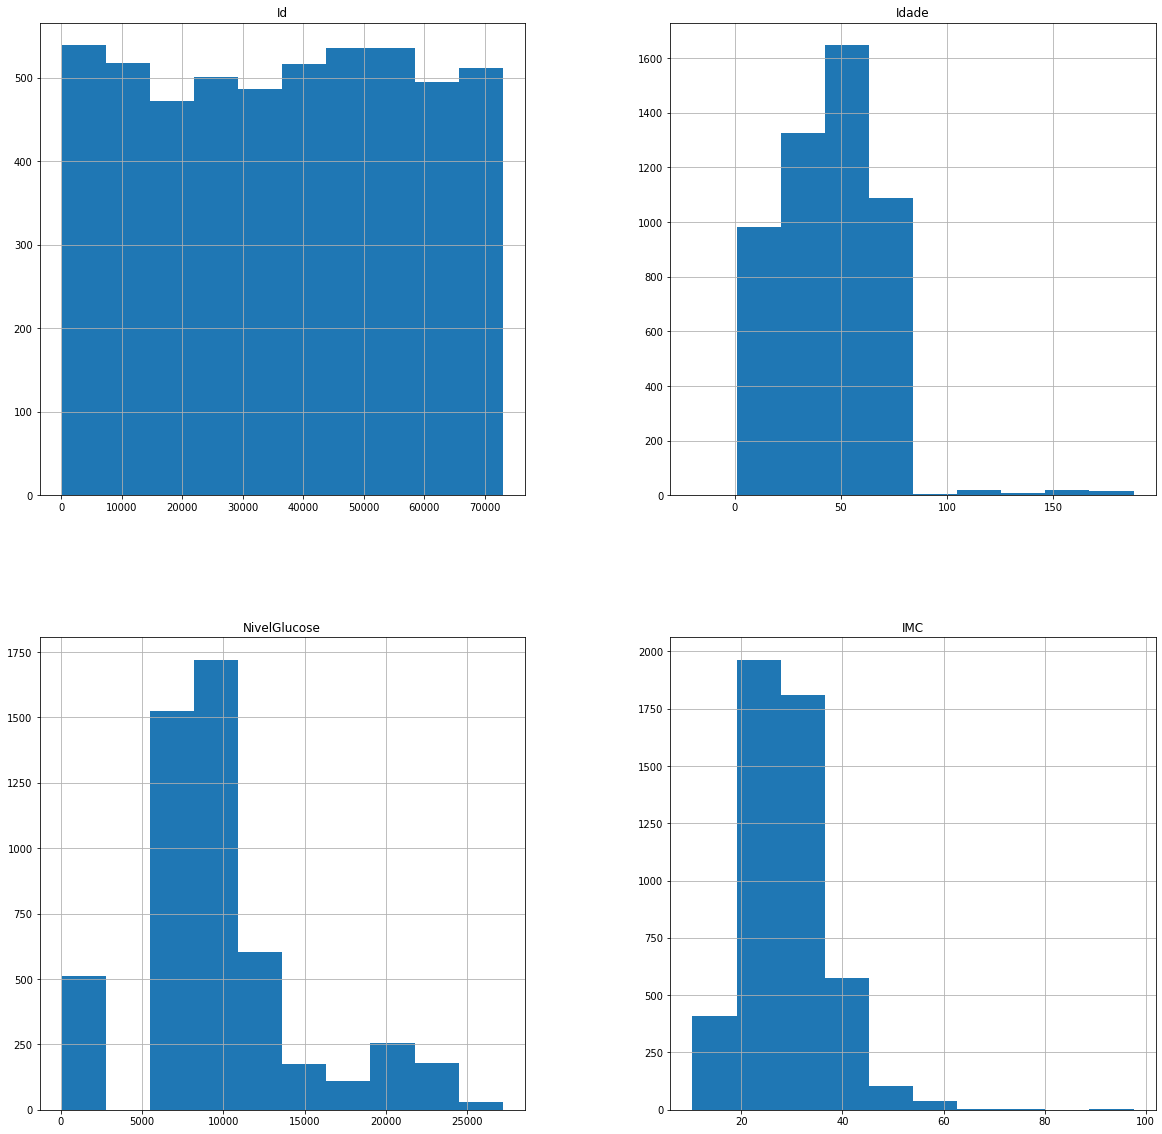

In [91]:
dados.hist(figsize=(20,20))

Podemos também fazer histogramas onde os dados são separados de acordo com algum atributo que se deseja observar. Por exemplo, vamos separar os dados de acordo com a coluna de AVC para explorar as possíveis relações entre a pessoa ter um AVC e os outros atributos

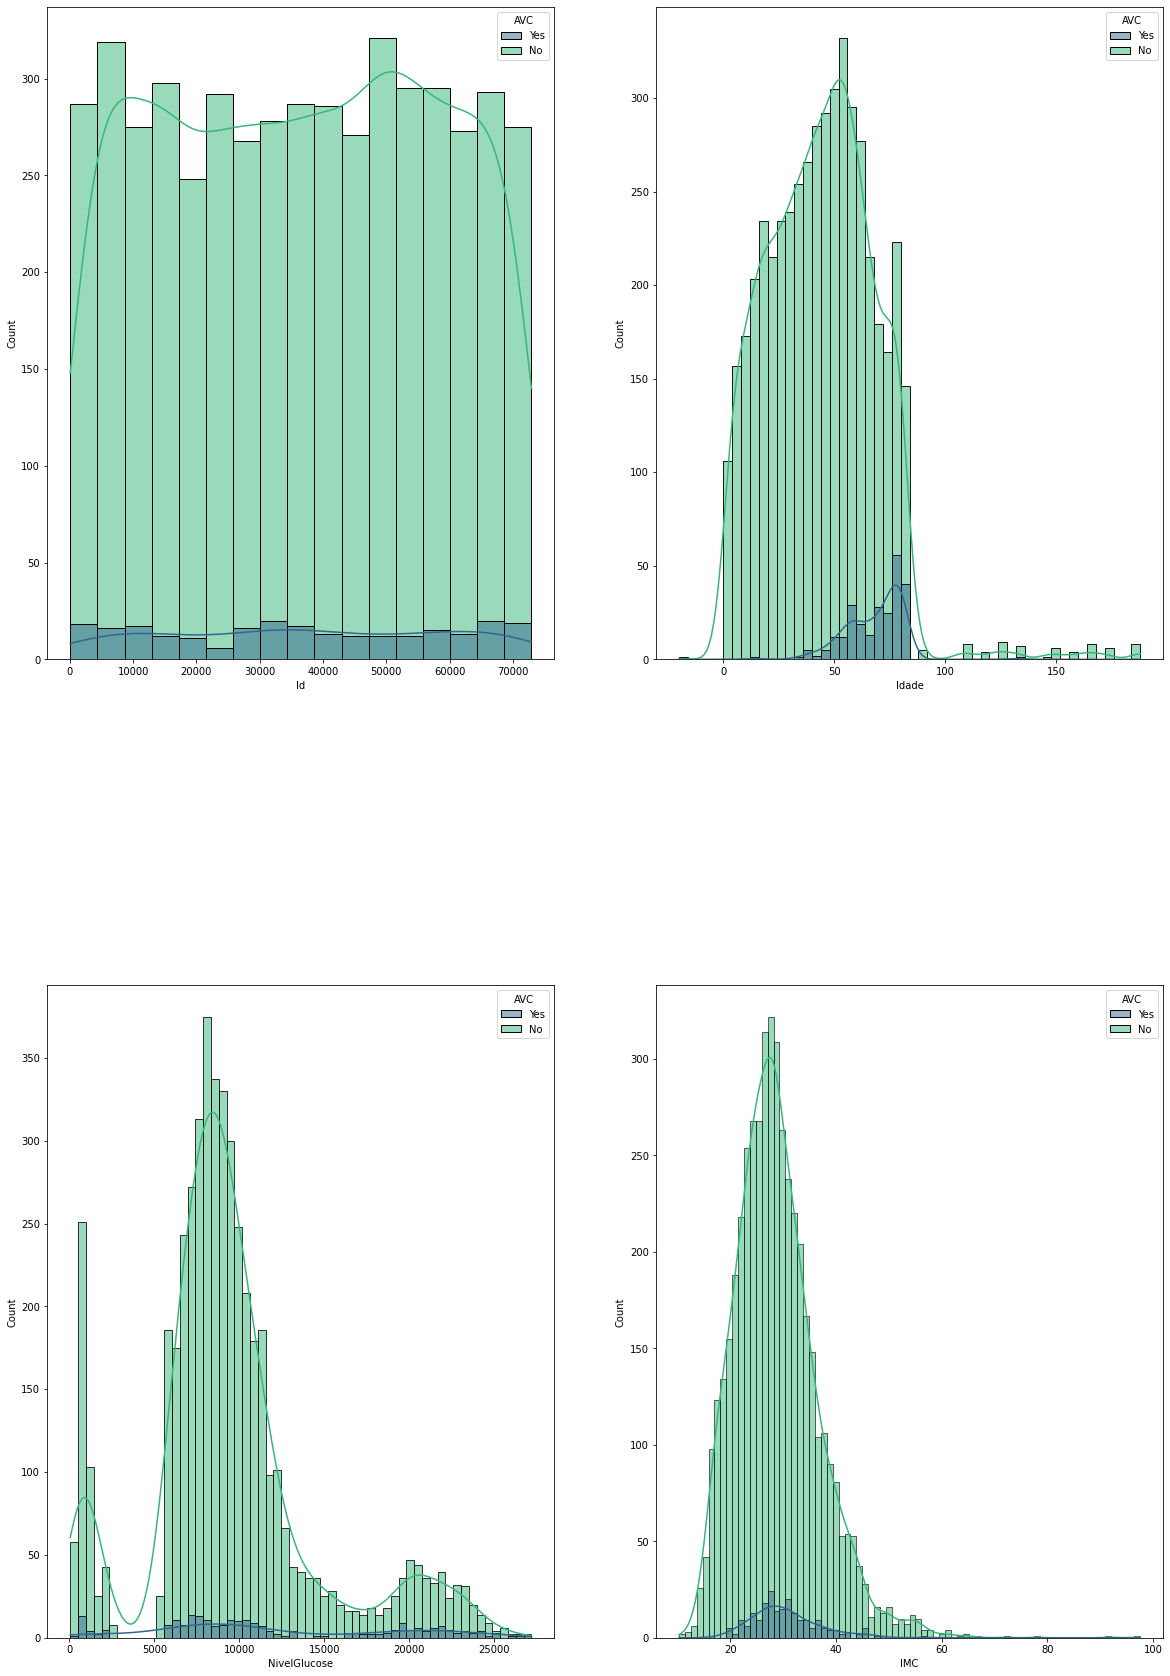

In [92]:
plt.figure(figsize=(20,30))
plt.subplots_adjust(hspace=0.5)
i = 1
for col_name in dados.columns.drop(colunas_categoricas):
    plt.subplot(2,2,i)
    sns.histplot(data=dados, x=col_name, kde=True, hue='AVC', multiple='layer', alpha=0.5, palette='viridis')
    i += 1

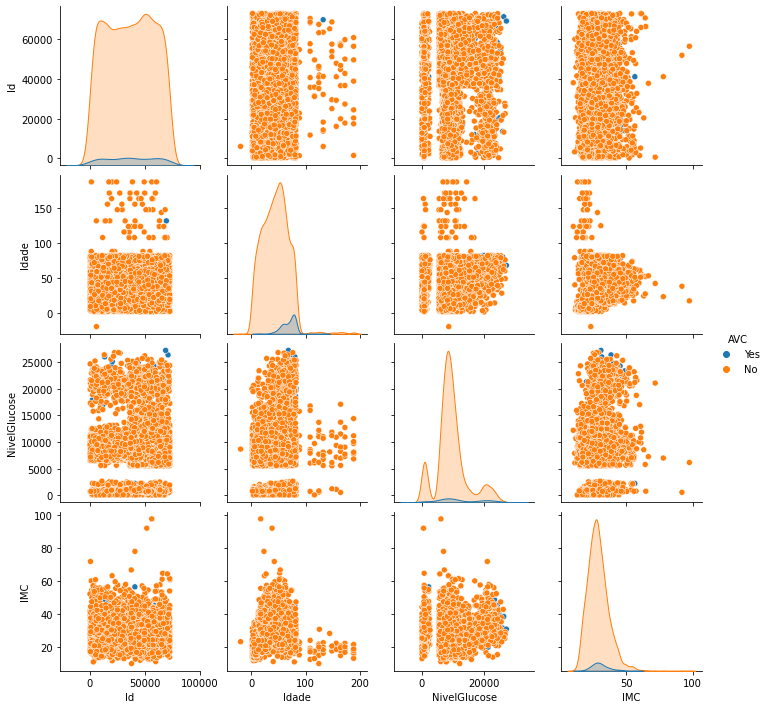

In [93]:
sns.pairplot(data = dados, hue = "AVC")

### Verificando a presença de outliers com Boxplots

Os gráficos do tipo boxplot nos permitem analisar as características da distribuição dos nossos atributos. Esse gráfico nos permite observar o limite inferior (desconsiderando valores discrepantes), o primeiro quartil (Q1), a mediana, o terceiro quartil (Q3) e o limite superior (desconsiderando valores discrepantes).



*   Q1 = percentil de 25, isto é 25% dos dados estão abaixo desse valor
*   Mediana = percentil de 50
*   Q3 = percentil de 75, isto é 75% dos dados estão abaixo desse valor
*   Limite superior = Q3+1,5*IQR 
*   Limite inferior = Q1-1,5*IQR



No exemplo abaixo temos um atributo em que temos valores discrepantes (outliers) e também é possível notar que os dados são assimétricos em relação a mediana.

<center>
<img src="https://drive.google.com/uc?export=view&id=1QJeB_P4KuZpNcMjmFZEbkLKyx-fcDADE" width="1000">



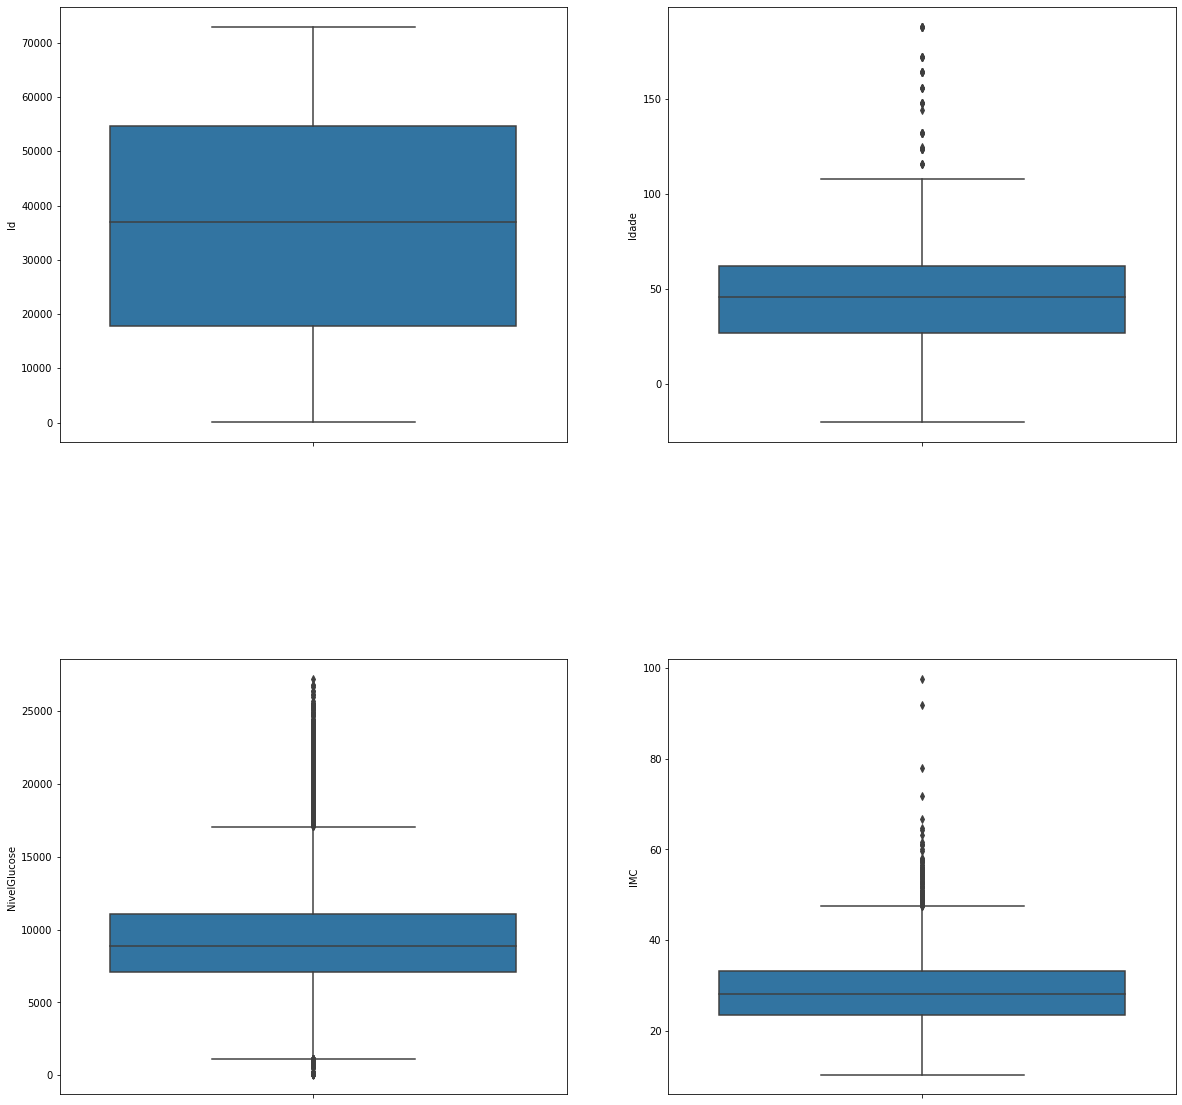

In [94]:
plt.figure(figsize=(20,20))
plt.subplots_adjust(hspace=0.5)

i = 1
for col_name in dados.columns.drop(colunas_categoricas):
    plt.subplot(2,2,i)
    sns.boxplot(data=dados, y=col_name)
    i +=1

Poderiamos plotar cada uma das colunas individualmente, entretanto o trabalho seria maior

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Idade')

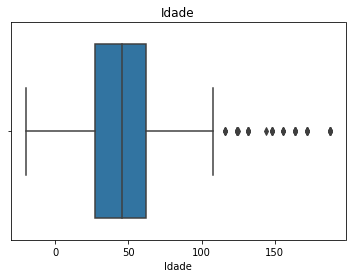

In [95]:
sns.boxplot(dados['Idade']).set_title('Idade')

Podemos perceber que temos valores discrepantes, por exemplo idades abaixo de 0 e acima de 100 anos.Valores muito discrepantes são conhecidos como **outliers**.

Para tratar os mesmos podemos:

*   Removê-los quando temos muitos exemplos no nosso conjunto de dados 
*   Substituí-lo pela mediana (valor que mais se repete na amostra) ou checar se o valor realmente é um outlier.



Além disso, o IMC e o nível de glucose também possuem outliers que podemos optar por tratá-los.

## Checando por valores nulos

Podemos checar por valores nulos utilizando o método `isnull()`

In [96]:
dados.isnull()

,Id,Genero,Idade,Hipertensão,DoencaCoracao,JaFoiCasado,Sintomas,NivelGlucose,IMC,Fumante,AVC
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
5105,False,False,False,False,False,False,False,False,True,False,False
5106,False,False,False,False,False,False,False,False,False,False,False
5107,False,False,False,False,False,False,False,False,False,False,False
5108,False,False,False,False,False,False,False,False,False,False,False


É possível contar a quantidade de valores verdadeiros ou falsos em cada uma das colunas acima usando o método `sum()`

In [97]:
dados.isnull().sum()

Id                 0
Genero             0
Idade              0
Hipertensão        0
DoencaCoracao      0
JaFoiCasado        0
Sintomas           0
NivelGlucose       0
IMC              201
Fumante            0
AVC                0
dtype: int64

Para o IMC temos 201 valores nulos que teremos que tratá-los posteriormente antes de usarmos qualquer algoritmo de IA.

In [98]:
dados[dados["IMC"].isnull()]

,Id,Genero,Idade,Hipertensão,DoencaCoracao,JaFoiCasado,Sintomas,NivelGlucose,IMC,Fumante,AVC
1,51676,Female,61,No,No,Yes,three symptoms,20221,NaN,never smoked,Yes
8,27419,Female,59,No,No,Yes,five or more symptoms,7615,NaN,Unknown,Yes
13,8213,Male,78,No,Yes,Yes,five or more symptoms,21984,NaN,Unknown,Yes
19,25226,Male,57,No,Yes,No,four symptoms,21708,NaN,Unknown,Yes
27,61843,Male,58,No,No,Yes,five or more symptoms,18984,NaN,Unknown,Yes
...,...,...,...,...,...,...,...,...,...,...,...
5039,42007,Male,41,No,No,No,five or more symptoms,7015,NaN,formerly smoked,No
5048,28788,Male,40,No,No,Yes,five or more symptoms,19115,NaN,smokes,No
5093,32235,Female,45,Yes,No,Yes,four symptoms,9502,NaN,smokes,No
5099,7293,Male,40,No,No,Yes,five or more symptoms,8394,NaN,smokes,No


# Ajustando os dados para do nosso problema

Para trabalharmos com modelos de IA normalmente as bibliotecas exigem que utilizem-se apenas valores númericos em cada um dos atributos do nosso conjunto de dados. Dessa forma, precisamos fazer os devidos ajustes listados anteriormente e alterar os textos para valores numéricos

**Obs.:** Algumas bibliotecas como o sklearn aceitam que a saída do nosso modelo seja um textual, entretanto outras biblitecas podem não aceitar isso.

Para a coluna de fumantes podemos aplicar o **One Hot Enconding** com o objetivo de transformar esse atributo em valores numéricos.

In [99]:
# Aplicando o One Hot Enconding
dados_1 = pd.get_dummies(dados["Fumante"], prefix = "Fumante")
dados_1.head()

,Fumante_Unknown,Fumante_formerly smoked,Fumante_never smoked,Fumante_smokes
0,0,1,0,0
1,0,0,1,0
2,0,0,1,0
3,0,0,0,1
4,0,0,1,0


In [100]:
# Concatenando os dados:
dados_corrigidos = pd.concat([dados, dados_1], axis=1)
dados_corrigidos.head()

,Id,Genero,Idade,Hipertensão,DoencaCoracao,JaFoiCasado,Sintomas,NivelGlucose,IMC,Fumante,AVC,Fumante_Unknown,Fumante_formerly smoked,Fumante_never smoked,Fumante_smokes
0,9046,Male,67,No,Yes,Yes,five or more symptoms,22869,36.6,formerly smoked,Yes,0,1,0,0
1,51676,Female,61,No,No,Yes,three symptoms,20221,NaN,never smoked,Yes,0,0,1,0
2,31112,Male,80,No,Yes,Yes,five or more symptoms,10592,32.5,never smoked,Yes,0,0,1,0
3,60182,Female,49,No,No,Yes,five or more symptoms,17123,34.4,smokes,Yes,0,0,0,1
4,1665,Female,79,Yes,No,Yes,three symptoms,17412,24.0,never smoked,Yes,0,0,1,0


Vamos agora fazer as conversões numéricas das colunas que temos valores textuais e aplicar o *Label Enconding* na coluna `JaFoiCasado`

In [101]:
# transformando os dados em valores numéricos
dados_corrigidos['Genero_num'] =  dados_corrigidos['Genero'].replace({'Female': 0, 
                                                                      'Male': 1})
dados_corrigidos['Hipertensão_num'] =  dados_corrigidos['Hipertensão'].replace({'No': 0, 
                                                                                'Yes': 1})
dados_corrigidos['DoencaCoracao_num'] =  dados_corrigidos['DoencaCoracao'].replace({'No': 0, 
                                                                                'Yes': 1})
dados_corrigidos['JaFoiCasado_num'] =  dados_corrigidos['JaFoiCasado'].replace({'No': 0,
                                                                                'N' : 0,
                                                                                'Never' : 0,
                                                                                'Y' : 1,
                                                                                'Yes': 1})

dados_corrigidos['AVC_num'] =  dados_corrigidos['AVC'].replace({'No': 0,
                                                                'Yes': 1})


# Label Enconding:
dados_corrigidos['Sintomas_Label_Enc'] =  dados_corrigidos['Sintomas'].replace({'no symptoms ': 0,
                                                                                'one or two symptoms ' : 1,
                                                                                'three symptoms ' : 2,
                                                                                'four symptoms ' : 3,
                                                                                'five or more symptoms ': 4})

dados_corrigidos.head()

,Id,Genero,Idade,Hipertensão,DoencaCoracao,JaFoiCasado,Sintomas,NivelGlucose,IMC,Fumante,...,Fumante_Unknown,Fumante_formerly smoked,Fumante_never smoked,Fumante_smokes,Genero_num,Hipertensão_num,DoencaCoracao_num,JaFoiCasado_num,AVC_num,Sintomas_Label_Enc
0,9046,Male,67,No,Yes,Yes,five or more symptoms,22869,36.6,formerly smoked,...,0,1,0,0,1,0,1,1,1,4
1,51676,Female,61,No,No,Yes,three symptoms,20221,NaN,never smoked,...,0,0,1,0,0,0,0,1,1,2
2,31112,Male,80,No,Yes,Yes,five or more symptoms,10592,32.5,never smoked,...,0,0,1,0,1,0,1,1,1,4
3,60182,Female,49,No,No,Yes,five or more symptoms,17123,34.4,smokes,...,0,0,0,1,0,0,0,1,1,4
4,1665,Female,79,Yes,No,Yes,three symptoms,17412,24.0,never smoked,...,0,0,1,0,0,1,0,1,1,2


In [102]:
dados_corrigidos.shape

(5110, 21)

Para o genero *Other* podemos optar pela exclusão do mesmo ou por preenchê-lo com a moda dos generos. Como temos apenas uma entrada como *Other*, optou-se por excluíla do conjunto de dados.

In [104]:
# Drop da linha com Genero igual a Other
# Podemos usar uma mascara onde True seja Male ou Female e False seja Other
dados_corrigidos = dados_corrigidos[dados_corrigidos["Genero"] != "Other"]

In [105]:
dados_corrigidos.shape

(5109, 21)

Podemos ver que removemos uma coluna do nosso problema! Checando os valores do genero para conferir:

In [108]:
#Checando os valores em genero
dados_corrigidos.groupby(['Genero_num']).size()

Genero_num
0    2994
1    2115
dtype: int64

Vamos agora tratar os valores nulos do nosso problema. Podemos excluir os valores nulos usando o método `dropna()` ou preencher os valores nulos com outro valor com o método `fillna()`. 

In [110]:
#tratar os valores nulos
dados_drop = dados_corrigidos.dropna()

In [111]:
print(f"Dados corrigidos: {dados_corrigidos.shape} \nDados com valores removidos: {dados_drop.shape}")

Dados corrigidos: (5109, 21) 
Dados com valores removidos: (4908, 21)


Para esse exemplo não iremos remover os valores, mas sim preencher eles com a mediana da coluna de IMC


In [112]:
mediana_IMC = dados_corrigidos["IMC"].median()
mediana_IMC

28.1

In [113]:
mascara = dados_corrigidos["IMC"].isnull()
mascara

0       False
1        True
2       False
3       False
4       False
        ...  
5105     True
5106    False
5107    False
5108    False
5109    False
Name: IMC, Length: 5109, dtype: bool

In [114]:
dados_corrigidos["IMC"].fillna(mediana_IMC,inplace=True)

In [115]:
dados_corrigidos[mascara].head()

,Id,Genero,Idade,Hipertensão,DoencaCoracao,JaFoiCasado,Sintomas,NivelGlucose,IMC,Fumante,...,Fumante_Unknown,Fumante_formerly smoked,Fumante_never smoked,Fumante_smokes,Genero_num,Hipertensão_num,DoencaCoracao_num,JaFoiCasado_num,AVC_num,Sintomas_Label_Enc
1,51676,Female,61,No,No,Yes,three symptoms,20221,28.1,never smoked,...,0,0,1,0,0,0,0,1,1,2
8,27419,Female,59,No,No,Yes,five or more symptoms,7615,28.1,Unknown,...,1,0,0,0,0,0,0,1,1,4
13,8213,Male,78,No,Yes,Yes,five or more symptoms,21984,28.1,Unknown,...,1,0,0,0,1,0,1,1,1,4
19,25226,Male,57,No,Yes,No,four symptoms,21708,28.1,Unknown,...,1,0,0,0,1,0,1,0,1,3
27,61843,Male,58,No,No,Yes,five or more symptoms,18984,28.1,Unknown,...,1,0,0,0,1,0,0,1,1,4


Vamos agora iniciar o tratamento dos **outliers** da idade. 

Para a idade temos valores discrepantes, onde por opção de projeto não iremos excluir esses valores do nosso conjunto de dados. Optaremos por substituí-los pela mediana.

In [116]:
# Encontrando a mediana das idades
mediana_Idade = dados_corrigidos["Idade"].median()
mediana_Idade

46.0

In [119]:
# Criando uma mascara para selecionar os valores acima de 100 anos menores ou iguais a zero
mascara = (dados_corrigidos["Idade"] <=  0 )  | ( dados_corrigidos["Idade"] >  100)
mascara

0       False
1       False
2       False
3       False
4       False
        ...  
5105    False
5106    False
5107    False
5108    False
5109    False
Name: Idade, Length: 5109, dtype: bool

In [118]:
# Checando a quantidade de valores que serão alterados.
dados_corrigidos[mascara].shape

(63, 21)

In [120]:
#Tratar o outlier de idades fora do domínio
dados_corrigidos.loc[mascara,"Idade"] = mediana_Idade

Vamos visualizar na sequência a alteração que fizemos na coluna de idade das pessoas.

In [121]:
dados_corrigidos[mascara].head()

,Id,Genero,Idade,Hipertensão,DoencaCoracao,JaFoiCasado,Sintomas,NivelGlucose,IMC,Fumante,...,Fumante_Unknown,Fumante_formerly smoked,Fumante_never smoked,Fumante_smokes,Genero_num,Hipertensão_num,DoencaCoracao_num,JaFoiCasado_num,AVC_num,Sintomas_Label_Enc
162,69768,Female,46,No,No,N,one or two symptoms,7037,28.1,Unknown,...,1,0,0,0,0,0,0,0,1,1
300,65199,Female,46,No,No,Yes,three symptoms,8151,28.5,Unknown,...,1,0,0,0,0,0,0,1,0,2
315,41940,Male,46,No,Yes,Yes,five or more symptoms,622,31.0,formerly smoked,...,0,1,0,0,1,0,1,1,0,4
356,5973,Male,46,No,No,Yes,five or more symptoms,8678,23.5,smokes,...,0,0,0,1,1,0,0,1,0,4
597,40639,Female,46,No,No,No,one or two symptoms,6053,17.5,Unknown,...,1,0,0,0,0,0,0,0,0,1


Para o IMC iremos definir como padrão valores dentro do intervalo de três desvios padrões **(DECISÃO DE PROJETO)**. Assim, inicialmente vamos ver quantos valores estão fora desse intevalo.

<center>
<img src="https://drive.google.com/uc?export=view&id=1FI9dHvoLrNB32ox5Iv2e-7vZv6iEAp29" width="500">

Fonte: https://www.ufrgs.br/probabilidade-estatistica/livro/cpt3/ch3_distribuicoes.html

In [125]:
# Média da coluna IMC
media_IMC = dados_corrigidos["IMC"].mean()
media_IMC

28.863300058719908

In [126]:
# Desvio padrão da coluna de IMC
desv_pad_IMC = dados_corrigidos["IMC"].std()
desv_pad_IMC

7.69978501414796

Assim o intervalo aceitável seria de:

In [127]:
# Imprimindo os valores minimos e máximos
print(f"Valor minimo: {media_IMC-3*desv_pad_IMC}\nValor máximo {media_IMC+3*desv_pad_IMC}")

Valor minimo: 5.763945016276029
Valor máximo 51.96265510116379


In [128]:
# Quantidade de valores abaixo ou acima de 3 desvios padrões
mask = (dados_corrigidos["IMC"]< media_IMC-3*desv_pad_IMC) | (dados_corrigidos["IMC"] > media_IMC+3*desv_pad_IMC)
dados_corrigidos.loc[mask,"IMC"].shape

(59,)

In [132]:
# substituindo os valores pela mediana
dados_corrigidos.loc[mask,"IMC"] = mediana_IMC

Conferindo se funcionou:

In [134]:
dados_corrigidos["IMC"][(dados_corrigidos["IMC"]< media_IMC-3*desv_pad_IMC) | (dados_corrigidos["IMC"] > media_IMC+3*desv_pad_IMC)].shape

(0,)

In [135]:
dados_corrigidos[mask].head()

,Id,Genero,Idade,Hipertensão,DoencaCoracao,JaFoiCasado,Sintomas,NivelGlucose,IMC,Fumante,...,Fumante_Unknown,Fumante_formerly smoked,Fumante_never smoked,Fumante_smokes,Genero_num,Hipertensão_num,DoencaCoracao_num,JaFoiCasado_num,AVC_num,Sintomas_Label_Enc
113,41069,Female,45,No,No,Yes,five or more symptoms,2241,28.1,never smoked,...,0,0,1,0,0,0,0,1,1,4
258,28674,Female,74,Yes,No,Yes,three symptoms,20584,28.1,never smoked,...,0,0,1,0,0,1,0,1,0,2
270,72911,Female,57,Yes,No,Yes,five or more symptoms,12954,28.1,smokes,...,0,0,0,1,0,1,0,1,0,4
333,1703,Female,52,No,No,Yes,five or more symptoms,8224,28.1,formerly smoked,...,0,1,0,0,0,0,0,1,0,4
358,66333,Male,52,No,No,Yes,three symptoms,784,28.1,never smoked,...,0,0,1,0,1,0,0,1,0,2


Por fim, podemos excluir as colunas que não iremos utilizar no nosso projeto, por exemplo as colunas com informaçõe textuais e o id de cada paciente:

In [136]:
dados_corrigidos.drop(columns = ["Id","Genero","Hipertensão", "DoencaCoracao", "JaFoiCasado", "Sintomas", "Fumante", "AVC"], inplace=True)

In [137]:
dados_corrigidos.head()

,Idade,NivelGlucose,IMC,Fumante_Unknown,Fumante_formerly smoked,Fumante_never smoked,Fumante_smokes,Genero_num,Hipertensão_num,DoencaCoracao_num,JaFoiCasado_num,AVC_num,Sintomas_Label_Enc
0,67,22869,36.6,0,1,0,0,1,0,1,1,1,4
1,61,20221,28.1,0,0,1,0,0,0,0,1,1,2
2,80,10592,32.5,0,0,1,0,1,0,1,1,1,4
3,49,17123,34.4,0,0,0,1,0,0,0,1,1,4
4,79,17412,24.0,0,0,1,0,0,1,0,1,1,2


Poderiamos ainda incluir uma verificação da relação dos dados com um possível caso de aplicação desse conjunto de dados: Verificação de possibilidade de um paciente de um hospital ter um AVC. Para isso podemos usar a correlação de Pearson:

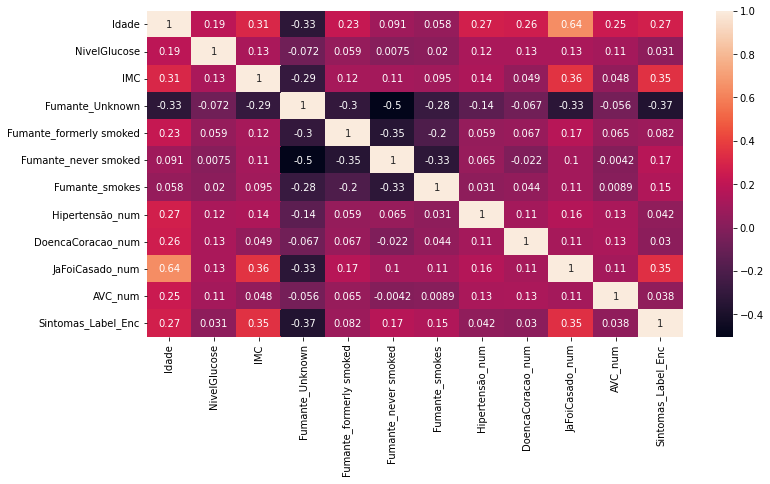

In [138]:
plt.figure(figsize=(12,6))
sns.heatmap(dados_corrigidos.corr(), annot=True)


In [140]:
dados_corrigidos.corr()['AVC_num'].sort_values(ascending=False)

AVC_num                    1.000000
Idade                      0.245881
DoencaCoracao_num          0.134905
Hipertensão_num            0.127891
NivelGlucose               0.110746
JaFoiCasado_num            0.108299
Fumante_formerly smoked    0.064683
IMC                        0.047506
Sintomas_Label_Enc         0.038055
Fumante_smokes             0.008920
Fumante_never smoked      -0.004163
Fumante_Unknown           -0.055924
Name: AVC_num, dtype: float64

Com isso completamos a nossa revisão de ciência de dados e aprendemos algumas ferramentas para a limpeza e tratamento dos nossos dados.